# Multiple sinusoidal amplitude, frequency and phase estimation using principal components AR estimator

In [1]:
from pyestimate import pc_ar_estimator
import numpy as np
import matplotlib.pyplot as plt

Generate a sum of noisy sinusoids for which we want to estimate amplitudes, frequencies and phases

In [2]:
N = 60 # number of samples
f = [0.36363, 0.33333, 0.25844, 0.23456, 0.13456, 0.03234] # frequencies to be estimated
A = [0.98798, 1.151861, 1.15984, 1.12345, 1.23456, 1.34567] # amplitude to be estimated
phi = [0, np.pi/4, 0, -np.pi/4, 0, np.pi/4] # phase to be estimated
p = len(A) # number of sinusoids
sigma = 0.01 # standard deviation of WGN
n = np.arange(N)
s = 0.0
for i in range(p):
    s += A[i] * np.cos(2*np.pi*f[i]*n+phi[i]) # original signal
w = np.random.default_rng(seed=0).normal(scale=sigma, size=N) # white gaussian noise
x = s+w # input signal for estimation: sine + noise

Estimate sinusoid parameters

In [3]:
A_hat, f_hat, phi_hat = pc_ar_estimator(x, p) # parameters estimation
print('Estimated amplitudes: \t', [f'{A_hat[i]:.3f}' for i in range(p)])
print('True amplitudes: \t', [f'{A[i]:.3f}' for i in range(p)])
print('Estimated frequencies: \t', [f'{f_hat[i]:.3f}' for i in range(p)])
print('True frequencies: \t', [f'{f[i]:.3f}' for i in range(p)])
print('Estimated phases: \t', [f'{phi_hat[i]:.3f}' for i in range(p)])
print('True phases: \t\t', [f'{phi[i]:.3f}' for i in range(p)])

Estimated amplitudes: 	 ['0.989', '1.152', '1.159', '1.123', '1.232', '1.344']
True amplitudes: 	 ['0.988', '1.152', '1.160', '1.123', '1.235', '1.346']
Estimated frequencies: 	 ['0.364', '0.333', '0.258', '0.235', '0.135', '0.032']
True frequencies: 	 ['0.364', '0.333', '0.258', '0.235', '0.135', '0.032']
Estimated phases: 	 ['0.003', '0.784', '0.001', '-0.785', '0.003', '0.780']
True phases: 		 ['0.000', '0.785', '0.000', '-0.785', '0.000', '0.785']


Reconstruct original signal from estimated parameters

In [4]:
s_hat = 0.0
for i in range(p):
    s_hat += A_hat[i] * np.cos(2*np.pi*f_hat[i]*n+phi_hat[i]) # estimated signal

Plot the original signal, the input signal corrupted with noise and the reconstructed signal

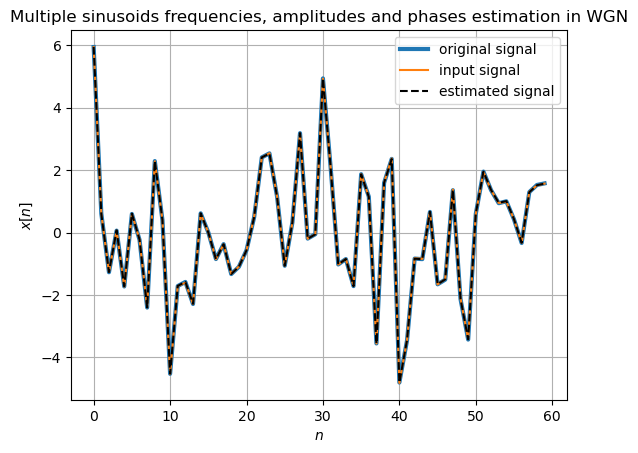

In [5]:
plt.plot(n, s, linewidth=3.0, label='original signal')
plt.plot(n, x, label='input signal')
plt.plot(n, s_hat, 'k--', label='estimated signal')
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.title('Multiple sinusoids frequencies, amplitudes and phases estimation in WGN')
plt.legend()
plt.grid()
plt.show()